In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_damri = pd.read_csv('../data/damri_apps_preprocessed.csv')

/tmp/ipykernel_17517/1560675951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')


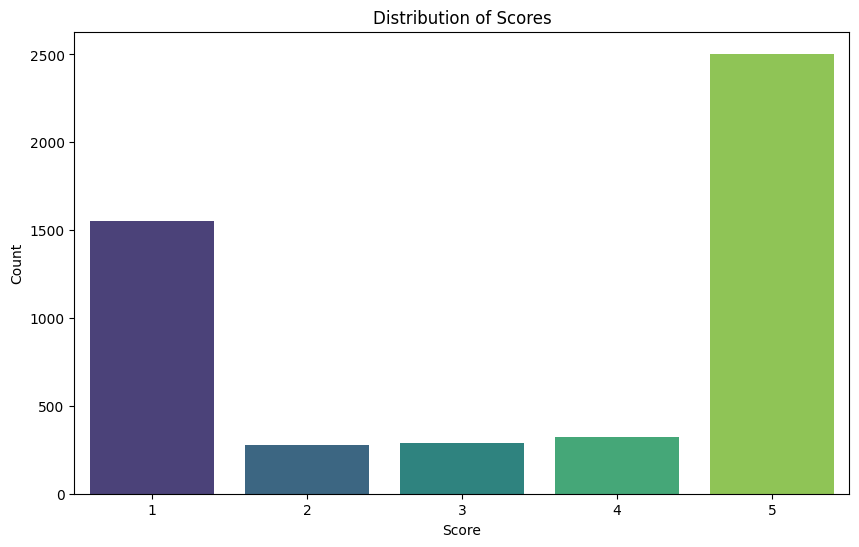

In [31]:
# Analisis deskriptif untuk kolom 'score'
score_counts = df_damri['score'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

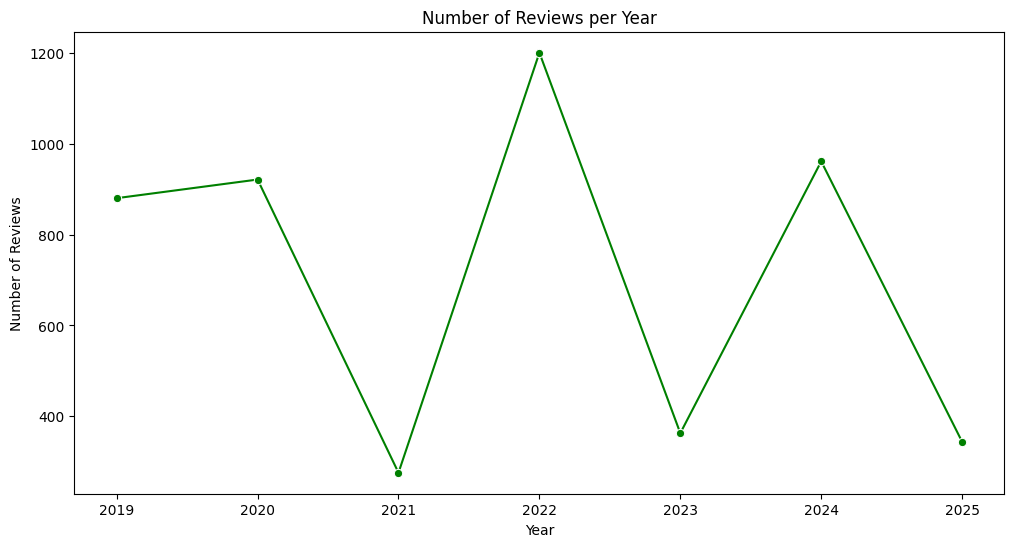

In [32]:
# Analisis deskriptif untuk kolom 'created_at'
df_damri['at'] = pd.to_datetime(df_damri['at'])
df_damri['year'] = df_damri['at'].dt.year
year_counts = df_damri['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='green')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

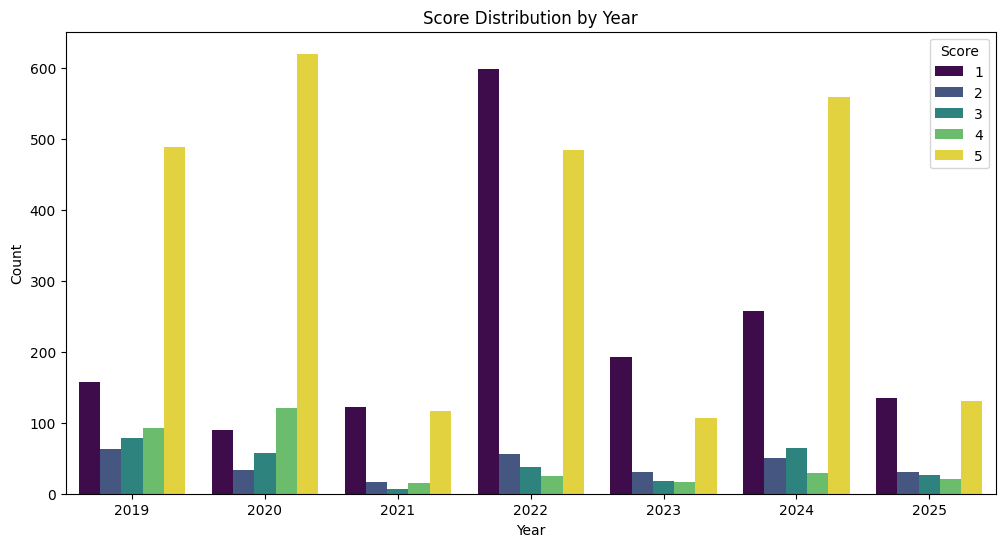

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='score', data=df_damri, palette='viridis')
plt.title('Score Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Score')
plt.show()

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords in Indonesian
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords from a given text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Filter positive and negative reviews
positive_reviews = df_damri[df_damri['score'] >= 4]['cleaned_text'].dropna()
negative_reviews = df_damri[df_damri['score'] <= 3]['cleaned_text'].dropna()

# Combine all positive and negative reviews into single strings
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Remove stopwords from the combined texts
positive_text = remove_stopwords(positive_text)
negative_text = remove_stopwords(negative_text)

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fadhinotgr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


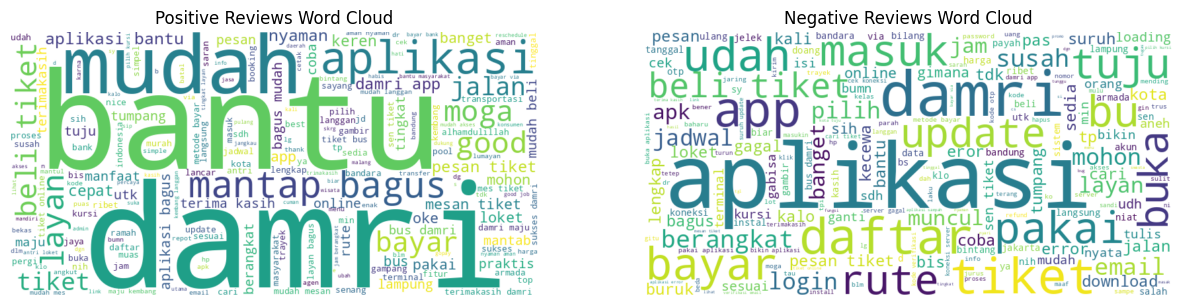

In [35]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()